In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import scipy.stats as stats

In [2]:
startup=pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 5 multple lnr reg\\50_Startups.csv")

In [3]:
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
startup.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [5]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
startup.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
startup.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [8]:
startup.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [9]:
startup.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [10]:
startup1 = startup.drop(['Administration'], axis = True)

In [11]:
startup1.corr()

,R&D Spend,Marketing Spend,Profit
R&D Spend,1.000000,0.724248,0.972900
Marketing Spend,0.724248,1.000000,0.747766
Profit,0.972900,0.747766,1.000000


In [12]:
startup1.columns

Index(['R&D Spend', 'Marketing Spend', 'State', 'Profit'], dtype='object')

### there is a space between R&D Spend and Marketing Spend , I want to remove that space so iam renaming it.

In [13]:
startup1.rename(columns={'R&D Spend':'R&DSpend','Marketing Spend':'MarketingSpend'},inplace=True)

In [14]:
startup1.columns

Index(['R&DSpend', 'MarketingSpend', 'State', 'Profit'], dtype='object')

### Performing ONE-HOT encoding

In [15]:
#transforming categorical data into Onehotcoding for dummy creation

In [16]:
dummys=pd.get_dummies(startup1.State)
dummys

,California,Florida,New York
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,1,0
5,0,0,1
6,1,0,0
7,0,1,0
8,0,0,1
9,1,0,0


In [17]:
merged = pd.concat([startup1, dummys], axis='columns')
merged

,R&DSpend,MarketingSpend,State,Profit,California,Florida,New York
0,165349.20,471784.10,New York,192261.83,0,0,1
1,162597.70,443898.53,California,191792.06,1,0,0
2,153441.51,407934.54,Florida,191050.39,0,1,0
3,144372.41,383199.62,New York,182901.99,0,0,1
4,142107.34,366168.42,Florida,166187.94,0,1,0
5,131876.90,362861.36,New York,156991.12,0,0,1
6,134615.46,127716.82,California,156122.51,1,0,0
7,130298.13,323876.68,Florida,155752.60,0,1,0
8,120542.52,311613.29,New York,152211.77,0,0,1
9,123334.88,304981.62,California,149759.96,1,0,0


In [18]:
startup_new = merged.drop(['State','California','New York'],axis='columns')
startup_new

,R&DSpend,MarketingSpend,Profit,Florida
0,165349.20,471784.10,192261.83,0
1,162597.70,443898.53,191792.06,0
2,153441.51,407934.54,191050.39,1
3,144372.41,383199.62,182901.99,0
4,142107.34,366168.42,166187.94,1
5,131876.90,362861.36,156991.12,0
6,134615.46,127716.82,156122.51,0
7,130298.13,323876.68,155752.60,1
8,120542.52,311613.29,152211.77,0
9,123334.88,304981.62,149759.96,0


In [19]:
startup_new.rename(columns={'Florida':'State'},inplace=True)
startup_new

,R&DSpend,MarketingSpend,Profit,State
0,165349.20,471784.10,192261.83,0
1,162597.70,443898.53,191792.06,0
2,153441.51,407934.54,191050.39,1
3,144372.41,383199.62,182901.99,0
4,142107.34,366168.42,166187.94,1
5,131876.90,362861.36,156991.12,0
6,134615.46,127716.82,156122.51,0
7,130298.13,323876.68,155752.60,1
8,120542.52,311613.29,152211.77,0
9,123334.88,304981.62,149759.96,0


#### detecting outliers

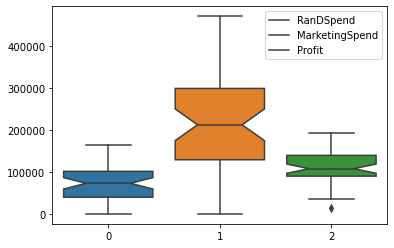

In [20]:
sns.boxplot(data=[startup_new['R&DSpend'],startup_new['MarketingSpend'],startup_new['Profit']],notch=True)
plt.legend(['RanDSpend','MarketingSpend','Profit'])

In [21]:
q1=startup_new.Profit.quantile(0.25)
q3=startup_new.Profit.quantile(0.75)
q1,q3

(90138.9025, 139765.97749999998)

In [22]:
IQR = q3-q1
IQR

49627.07499999998

In [23]:
lowerlimit=q1-1.5*(IQR)
upperlimit=q3+1.5*(IQR)
lowerlimit , upperlimit


(15698.290000000023, 214206.58999999997)

In [24]:
startup_new[(startup_new.Profit<lowerlimit)|(startup_new.Profit>upperlimit)]

,R&DSpend,MarketingSpend,Profit,State
49,0.0,45173.06,14681.4,0


In [25]:
startup_new.drop(startup_new[ (startup_new.Profit > upperlimit)| (startup_new.Profit < lowerlimit) ].index , inplace=True)

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
startup_new1 = scaler . fit_transform(startup_new.iloc[:,:])
startup_new1

array([[ 2.01832469e+00,  2.14611996e+00,  2.07155597e+00,
        -6.96310624e-01],
       [ 1.95670428e+00,  1.91359564e+00,  2.05912153e+00,
        -6.96310624e-01],
       [ 1.75164950e+00,  1.61370926e+00,  2.03949011e+00,
         1.43614066e+00],
       [ 1.54854512e+00,  1.40745668e+00,  1.82380835e+00,
        -6.96310624e-01],
       [ 1.49781841e+00,  1.26544171e+00,  1.38140055e+00,
         1.43614066e+00],
       [ 1.26870558e+00,  1.23786573e+00,  1.13796794e+00,
        -6.96310624e-01],
       [ 1.33003620e+00, -7.22891254e-01,  1.11497651e+00,
        -6.96310624e-01],
       [ 1.23334870e+00,  9.12791275e-01,  1.10518529e+00,
         1.43614066e+00],
       [ 1.01486978e+00,  8.10532777e-01,  1.01146229e+00,
        -6.96310624e-01],
       [ 1.07740527e+00,  7.55234477e-01,  9.46564805e-01,
        -6.96310624e-01],
       [ 5.97659604e-01,  1.23002453e-01,  8.50269533e-01,
         1.43614066e+00],
       [ 5.69864464e-01,  2.94639173e-01,  8.00969295e-01,
      

In [27]:
startup_new.shape

(49, 4)

In [28]:
startup_new.skew()

R&DSpend          0.166914
MarketingSpend   -0.080504
Profit            0.225195
State             0.763401
dtype: float64

In [29]:
startup_new.kurtosis()

R&DSpend         -0.730525
MarketingSpend   -0.598297
Profit           -0.283295
State            -1.479354
dtype: float64

In [30]:
startup_new.isnull().sum()

R&DSpend          0
MarketingSpend    0
Profit            0
State             0
dtype: int64

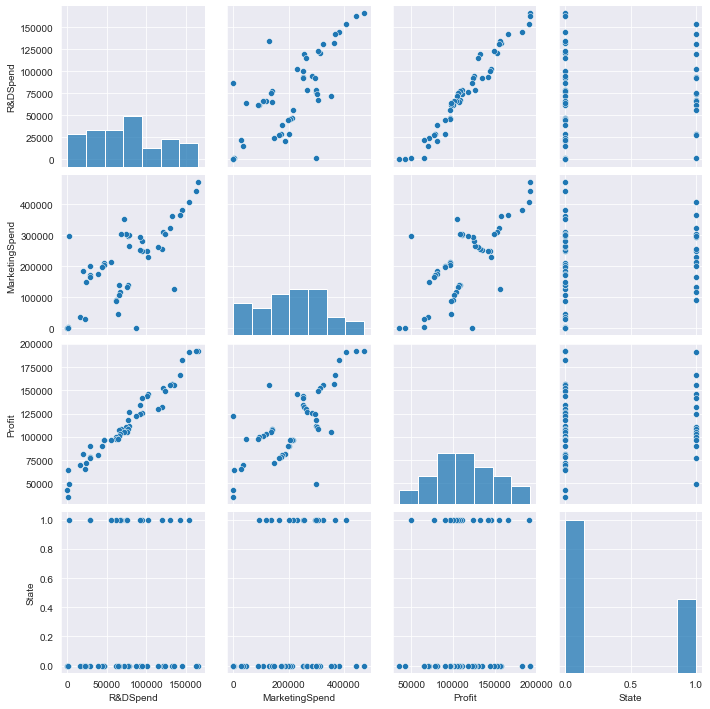

In [31]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_new)

In [32]:
startup_new.corr()

,R&DSpend,MarketingSpend,Profit,State
R&DSpend,1.000000,0.711654,0.978437,0.085734
MarketingSpend,0.711654,1.000000,0.739307,0.191104
Profit,0.978437,0.739307,1.000000,0.088008
State,0.085734,0.191104,0.088008,1.000000


In [33]:
startup_new.rename(columns={'R&DSpend':'RandDSpend',},inplace=True)
startup_new.columns

Index(['RandDSpend', 'MarketingSpend', 'Profit', 'State'], dtype='object')

#### Preparing a model

In [34]:
import statsmodels.formula.api as smf 
model = smf.ols('Profit~RandDSpend+MarketingSpend+State',data=startup_new).fit()

In [35]:
model.params

Intercept         49898.027249
RandDSpend            0.774735
MarketingSpend        0.028070
State              -606.213741
dtype: float64

In [36]:
print(model.tvalues, '\n',model.pvalues)

Intercept         20.720132
RandDSpend        21.832442
MarketingSpend     2.093080
State             -0.250672
dtype: float64 
 Intercept         1.200043e-24
RandDSpend        1.405363e-25
MarketingSpend    4.201005e-02
State             8.032084e-01
dtype: float64


In [37]:
(model.rsquared,model.rsquared_adj)

(0.961139943795597, 0.9585492733819702)

#### calculating Variance Inflation Factor 

In [38]:
rsq_hp = smf.ols('Profit~RandDSpend+MarketingSpend+State',data=startup_new).fit().rsquared  
vif_hp = 1/(1-rsq_hp)  # 16.33

rsq_wt = smf.ols('RandDSpend~Profit++MarketingSpend+State',data=startup_new).fit().rsquared  
vif_wt = 1/(1-rsq_wt)  # 564.98

rsq_vol = smf.ols('MarketingSpend~Profit+RandDSpend+State',data=startup_new).fit().rsquared  
vif_vol = 1/(1-rsq_vol) #  564.84

rsq_sp = smf.ols('State~Profit+RandDSpend+MarketingSpend',data=startup_new).fit().rsquared  
vif_sp = 1/(1-rsq_sp)  #  16.35



In [39]:

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = startup_new[list(startup_new.columns[:-2])]

vif_info = pd.DataFrame()
vif_info['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif_info['Column'] = X.columns
vif_info.sort_values('VIF', ascending=False)

,VIF,Column
0,7.186744,RandDSpend
1,7.186744,MarketingSpend


#### Residual Analysis
### Test for Normality of Residuals (Q-Q Plot)

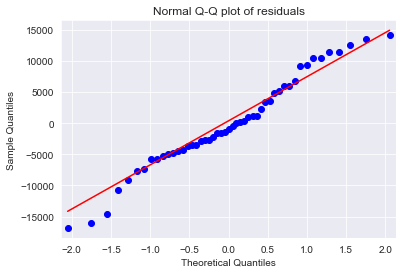

In [40]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [41]:
list(np.where(model.resid>10))

[array([ 0,  1,  2,  3,  8, 10, 11, 12, 13, 16, 19, 20, 25, 30, 34, 35, 36,
        37, 38, 40, 41, 43, 45], dtype=int64)]

##### Residual Plot for Homoscedasticity

In [42]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

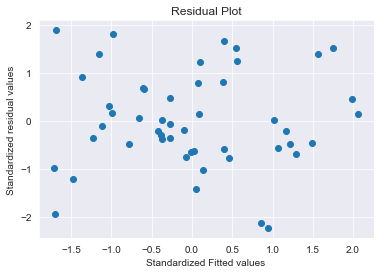

In [43]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

#### Residual Vs Regressors

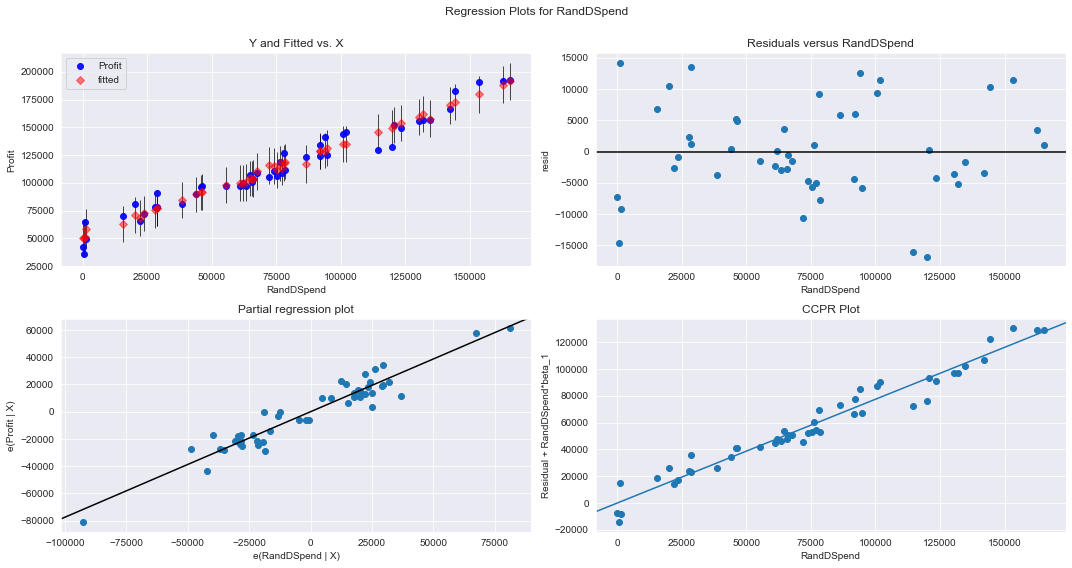

In [44]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RandDSpend", fig=fig)
plt.show()

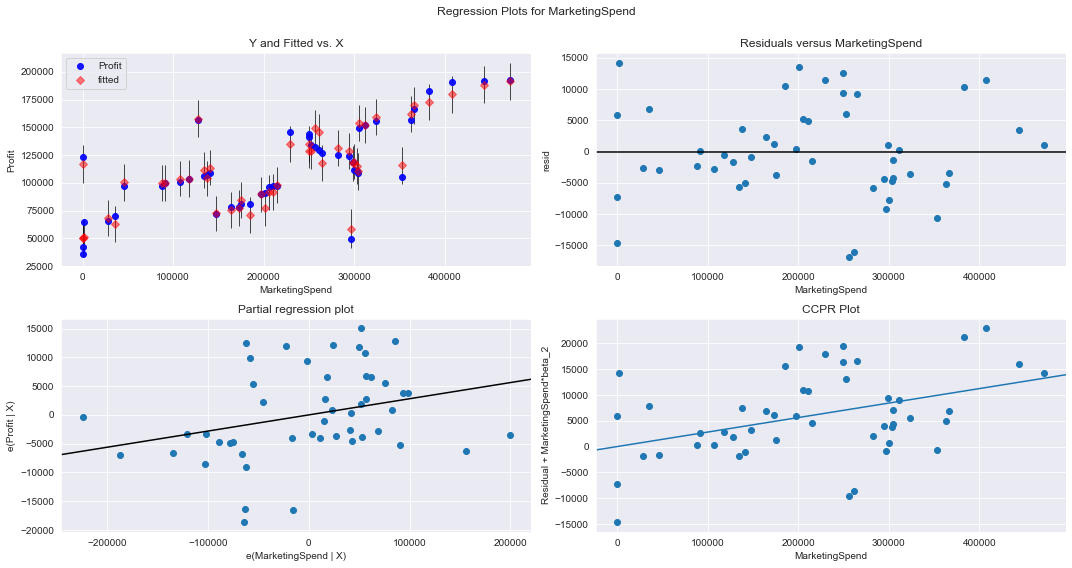

In [45]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MarketingSpend", fig=fig)
plt.show()

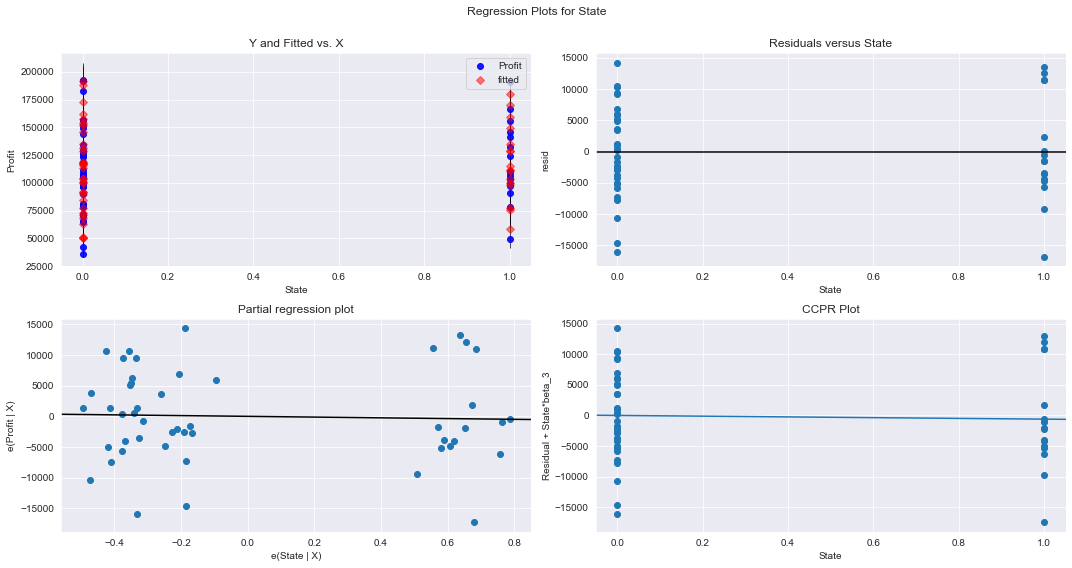

In [46]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "State", fig=fig)
plt.show()

#### Model Deletion Diagnostics
#### Detecting Influencers/Outliers
#### Cook’s Distance

In [47]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

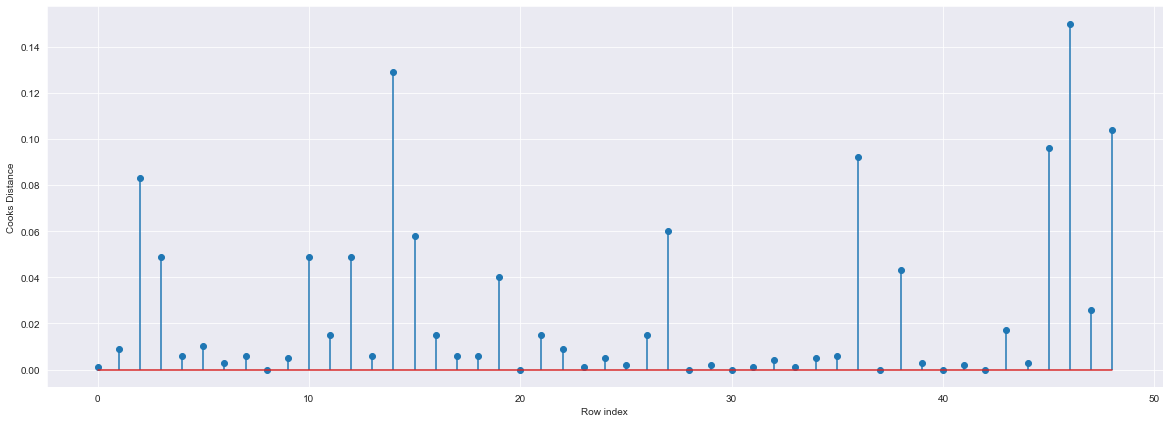

In [48]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_new)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [49]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(46, 0.14994558265337016)

#### High Influence points

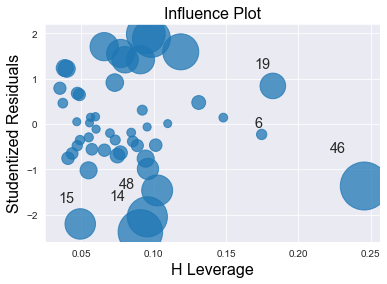

In [50]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [51]:
k = startup_new.shape[1]
n = startup_new.shape[0]
leverage_cutoff = 3*((k + 1)/n)

#### From the above plot, it is evident that data point 19 and 46 are the influencers

In [52]:
startup_new[startup_new.index.isin([19, 46])]

,RandDSpend,MarketingSpend,Profit,State
19,86419.70,0.00,122776.86,0
46,1315.46,297114.46,49490.75,1


In [53]:
#See the differences in RandDSpend and other variable values
startup_new.head()

,RandDSpend,MarketingSpend,Profit,State
0,165349.20,471784.10,192261.83,0
1,162597.70,443898.53,191792.06,0
2,153441.51,407934.54,191050.39,1
3,144372.41,383199.62,182901.99,0
4,142107.34,366168.42,166187.94,1


#### Predicting new data point

In [54]:
#New data for prediction

new_data=pd.DataFrame({'RandDSpend':185349.20,'MarketingSpend':491784.10,'State':1},index=[1])

In [55]:
model.predict(new_data)

1    206692.951971
dtype: float64

In [56]:
model.predict(startup_new.iloc[0:3,])

0    191243.049888
1    188328.608234
2    179619.248471
dtype: float64

In [57]:
pred_y = model.predict(startup_new)

In [58]:
pred_y

0     191243.049888
1     188328.608234
2     179619.248471
3     172504.991549
4     169665.876422
5     162253.375213
6     157774.451055
7     159329.719713
8     152033.679050
9     154010.866242
10    134680.113429
11    134902.575835
12    129024.463940
13    128260.181143
14    149416.496531
15    145971.673523
16    117757.830257
17    131164.238995
18    128651.629982
19    116850.433798
20    117358.205819
21    119042.853033
22    115132.293708
23    110166.616979
24    113532.734874
25    103868.727097
26    111414.589771
27    115676.326751
28    103780.727033
29    103732.328539
30     99879.219404
31     99738.863504
32    100316.747904
33     98309.813644
34     91783.109380
35     91315.667472
36     77144.340220
37     89571.260399
38     70771.059697
39     84682.959729
40     77025.457157
41     75518.194203
42     72367.933462
43     62908.321915
44     67875.273788
45     50726.384839
46     58651.046549
47     49898.027249
48     50317.972609
dtype: float64

##### TOYOTA COROLLA PRICE PREDICTION

In [59]:
df = pd.read_csv("C:\\Users\\sunee\\Desktop\\data science total\\assignments\\assignment 5 multple lnr reg\\ToyotaCorolla.csv",usecols=["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"])

In [60]:
df.tail()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015
1435,6950,76,1,110,1600,5,5,19,1114


In [61]:
df.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [62]:
df.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Price          1436 non-null   int64
 1   Age_08_04      1436 non-null   int64
 2   KM             1436 non-null   int64
 3   HP             1436 non-null   int64
 4   cc             1436 non-null   int64
 5   Doors          1436 non-null   int64
 6   Gears          1436 non-null   int64
 7   Quarterly_Tax  1436 non-null   int64
 8   Weight         1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [64]:
df.isnull().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [65]:
df.skew()

Price             1.703885
Age_08_04        -0.826702
KM                1.015912
HP                0.955836
cc               27.431793
Doors            -0.076395
Gears             2.283960
Quarterly_Tax     1.993834
Weight            3.108639
dtype: float64

In [66]:
df.kurtosis()

Price              3.737781
Age_08_04         -0.076632
KM                 1.685057
HP                 8.836434
cc               930.711227
Doors             -1.874765
Gears             37.703476
Quarterly_Tax      4.298345
Weight            19.362901
dtype: float64

In [67]:
df.shape

(1436, 9)

In [68]:
df.drop(columns=['Doors'],inplace=True)

In [69]:
df.corr()

,Price,Age_08_04,KM,HP,cc,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.014629,0.306996,0.335637
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.020613,0.626134,1.000000


In [70]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df1 = scaler.fit_transform(df.iloc[:,:])

In [71]:
df1

array([[ 0.76376268, -1.77196633, -0.57469494, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.83271485, -1.77196633,  0.11745379, ..., -0.14042519,
         2.98867967,  1.75856113],
       [ 0.88787659, -1.71818412, -0.71538641, ..., -0.14042519,
         2.98867967,  1.75856113],
       ...,
       [-0.6152808 ,  0.80957948, -1.37403589, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-0.96004167,  0.75579727, -1.37670303, ..., -0.14042519,
        -0.44078503, -1.09191497],
       [-1.04278428,  1.0784905 , -1.82784925, ..., -0.14042519,
        -1.65690726,  0.78939926]])

In [72]:
#transforming data into log
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='cc', ylabel='Density'>

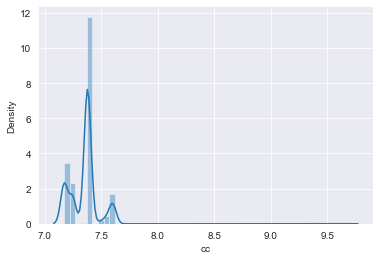

In [73]:
df['cc']=np.log(df['cc']+1)
sns.distplot(df['cc'])

In [74]:
#transforming data into log

<AxesSubplot:xlabel='Weight', ylabel='Density'>

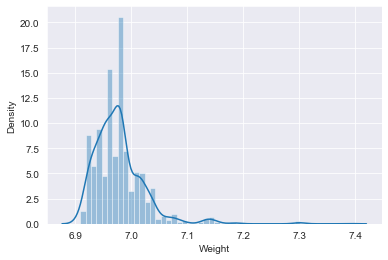

In [75]:
df['Weight']=np.log(df['Weight']+1)
sns.distplot(df['Weight'])

### before transforming the data weight skew is +3 after using log function skew is decreased 2.44

In [76]:
#using resiprocal transforming to make data into more normal

<AxesSubplot:xlabel='Weight', ylabel='Density'>

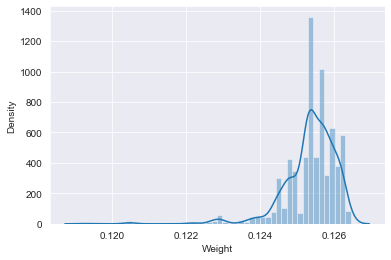

In [77]:
df['Weight']=1/(df['Weight']+1)
sns.distplot(df['Weight'])

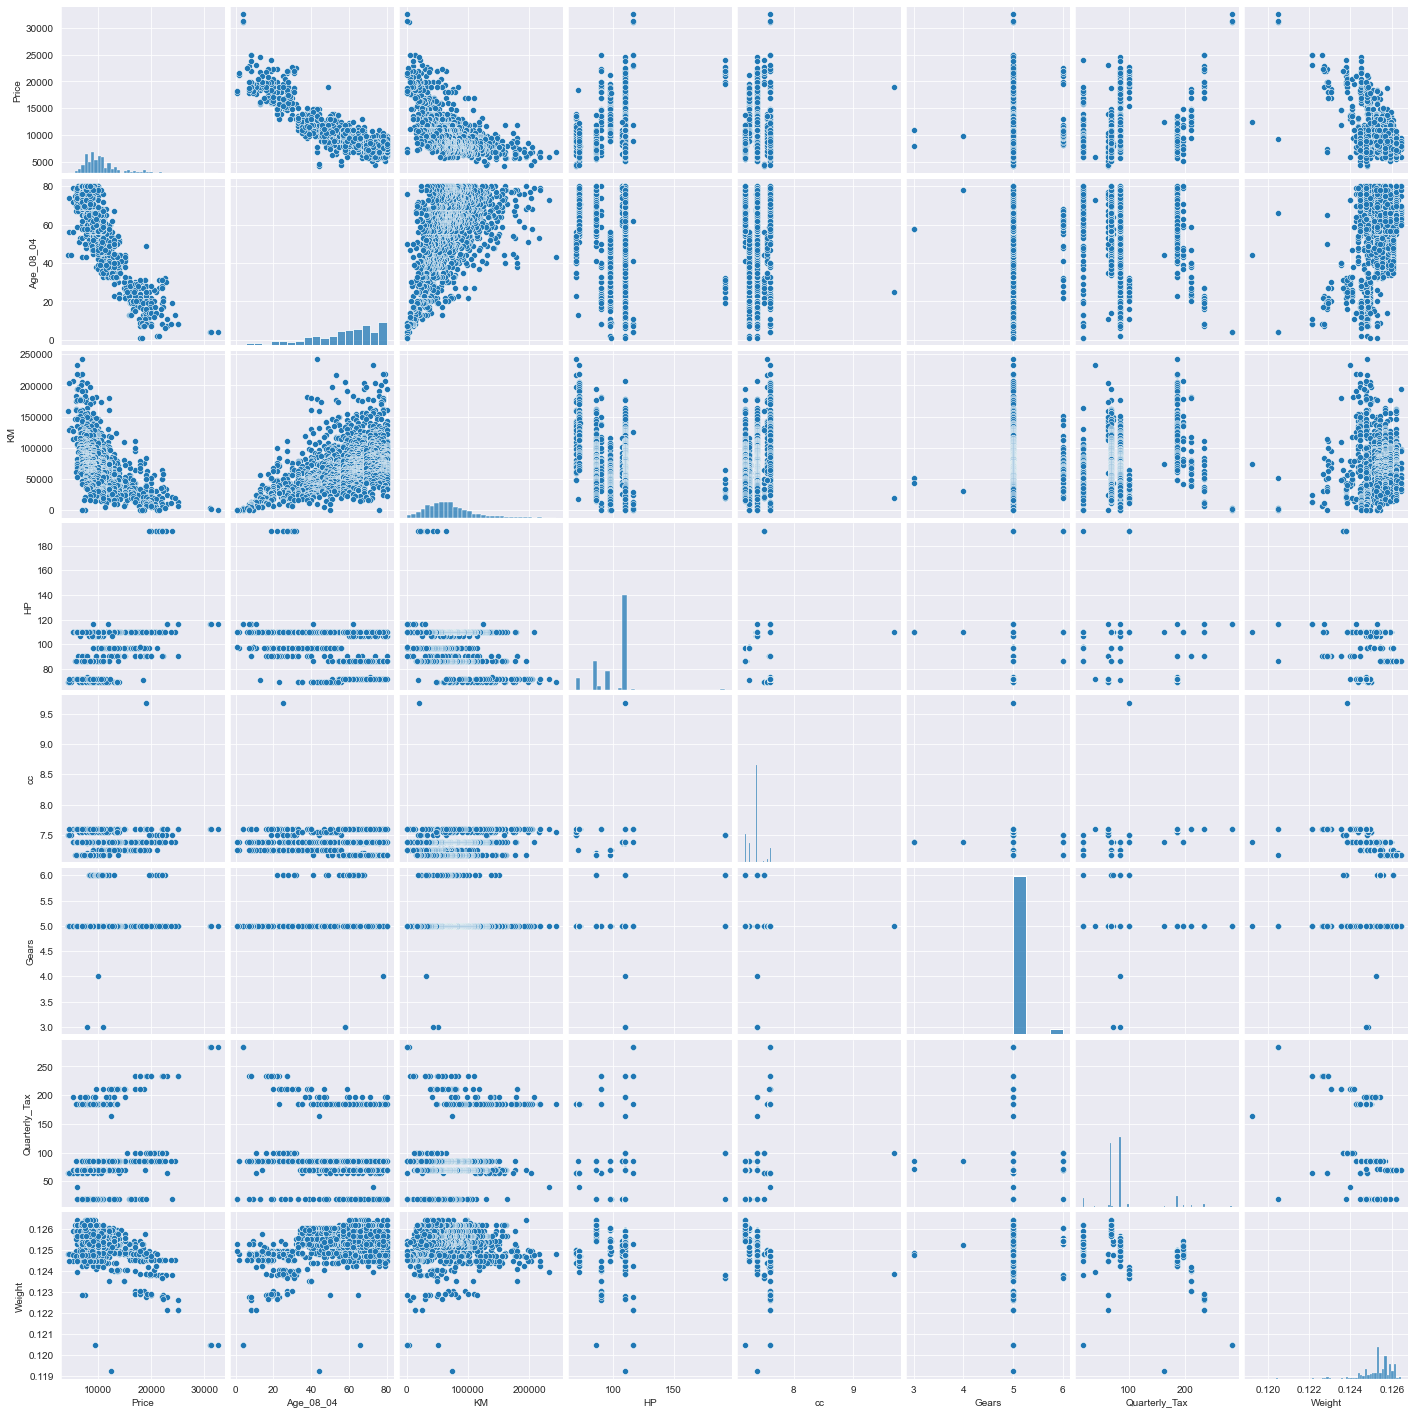

In [78]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid')
sns.pairplot(df)

### prepairing model

In [79]:
import statsmodels.formula.api as smf
model = smf.ols('Price~Age_08_04+KM+HP+cc+Gears+Weight',data=df).fit()

In [80]:
model.params

Intercept    2.290631e+05
Age_08_04   -1.204307e+02
KM          -1.863817e-02
HP           3.004834e+01
cc          -2.012289e+03
Gears        6.231218e+02
Weight      -1.609054e+06
dtype: float64

In [81]:
print(model.tvalues,'\n', model.pvalues)

Intercept    21.076511
Age_08_04   -45.764811
KM          -14.835084
HP           11.440967
cc           -5.551842
Gears         3.241949
Weight      -22.089729
dtype: float64 
 Intercept     4.383569e-86
Age_08_04    2.521906e-282
KM            2.046908e-46
HP            4.601786e-29
cc            3.365308e-08
Gears         1.214531e-03
Weight        2.915463e-93
dtype: float64


In [82]:
(model.rsquared,model.rsquared_adj)

(0.864889304902982, 0.8643220101719938)

#### Simple linear regression

In [83]:
ml_v=smf.ols('Price~Age_08_04',data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n' , ml_v.pvalues)

Intercept    138.907847
Age_08_04    -68.978267
dtype: float64 
 Intercept    0.0
Age_08_04    0.0
dtype: float64


In [84]:
ml_v=smf.ols('Price~KM', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    88.510378
KM          -26.267601
dtype: float64 
 Intercept     0.000000e+00
KM           1.757913e-124
dtype: float64


In [85]:
ml_v=smf.ols('Price~HP', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept     4.803134
HP           12.567862
dtype: float64 
 Intercept    1.725695e-06
HP           1.926234e-34
dtype: float64


In [86]:
ml_v=smf.ols('Price~cc', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept   -4.871503
cc           6.923107
dtype: float64 
 Intercept    1.230375e-06
cc           6.644987e-12
dtype: float64


In [87]:
ml_v=smf.ols('Price~Gears', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    1.814534
Gears        2.394401
dtype: float64 
 Intercept    0.069804
Gears        0.016775
dtype: float64


In [88]:
ml_v=smf.ols('Price~Quarterly_Tax', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept        41.330311
Quarterly_Tax     8.507487
dtype: float64 
 Intercept        1.532168e-246
Quarterly_Tax     4.407393e-17
dtype: float64


In [89]:
ml_v=smf.ols('Price~Weight', data = df).fit()
#t and p_values
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    28.154819
Weight      -27.367132
dtype: float64 
 Intercept    3.314950e-139
Weight       5.072688e-133
dtype: float64


### calculating VIF

In [90]:
rsq_Age_08_04 = smf.ols('Age_08_04~KM+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_Age_08_04 = 1/(1-rsq_Age_08_04) 

rsq_KM = smf.ols('KM~Age_08_04+HP+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~KM+Age_08_04+cc+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~KM+Age_08_04+HP+Gears+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Gears = smf.ols('Gears~KM+Age_08_04+HP+cc+Quarterly_Tax+Weight',data=df).fit().rsquared  
vif_Gears = 1/(1-rsq_Gears) 

rsq_Quarterly_Tax = smf.ols('Quarterly_Tax~HP+KM+Age_08_04+cc+Gears+Weight',data=df).fit().rsquared  
vif_Quarterly_Tax= 1/(1-rsq_Quarterly_Tax) 

rsq_Weight = smf.ols('Weight~cc+KM+Age_08_04+HP+Gears+Quarterly_Tax',data=df).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 


In [91]:
#sorting vif values in a data frame
d1 = {'Variables':['Age_08_04','KM','HP','cc','Gears','Quarterly_Tax','Weight'],
      'VIF':[vif_Age_08_04,vif_KM,vif_HP,vif_cc,vif_Gears,vif_Quarterly_Tax,vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age_08_04,1.934006
1,KM,1.832113
2,HP,1.553432
3,cc,2.051611
4,Gears,1.060308
5,Quarterly_Tax,2.561597
6,Weight,2.744810


##### Residual analysis

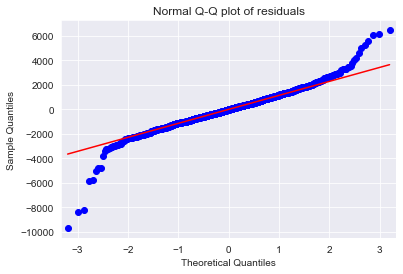

In [92]:
import statsmodels.api as sm
qqplot = sm.qqplot(model.resid,line='q') #line=45 to draw the diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [93]:
list(np.where(model.resid>-800))

[array([   6,    7,    8, ..., 1430, 1432, 1433], dtype=int64)]

#### Residual Plot Homoscedasticity

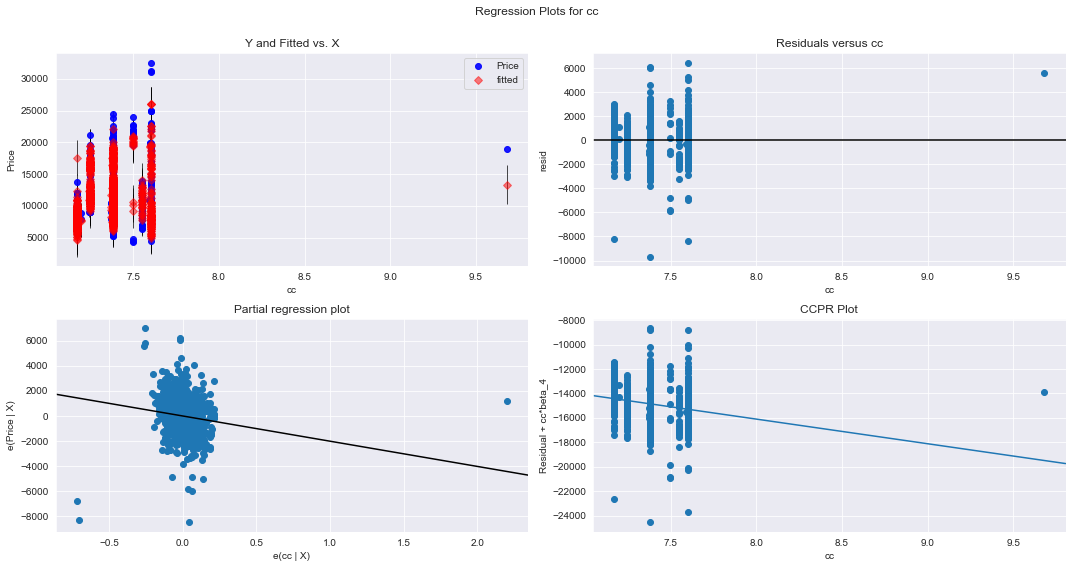

In [94]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

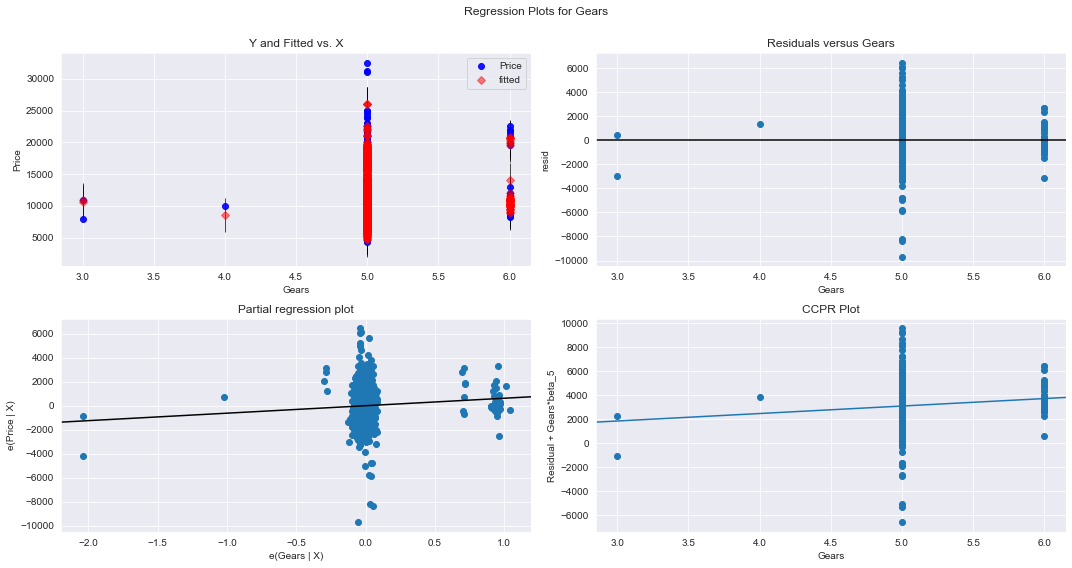

In [95]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Gears", fig=fig)
plt.show()

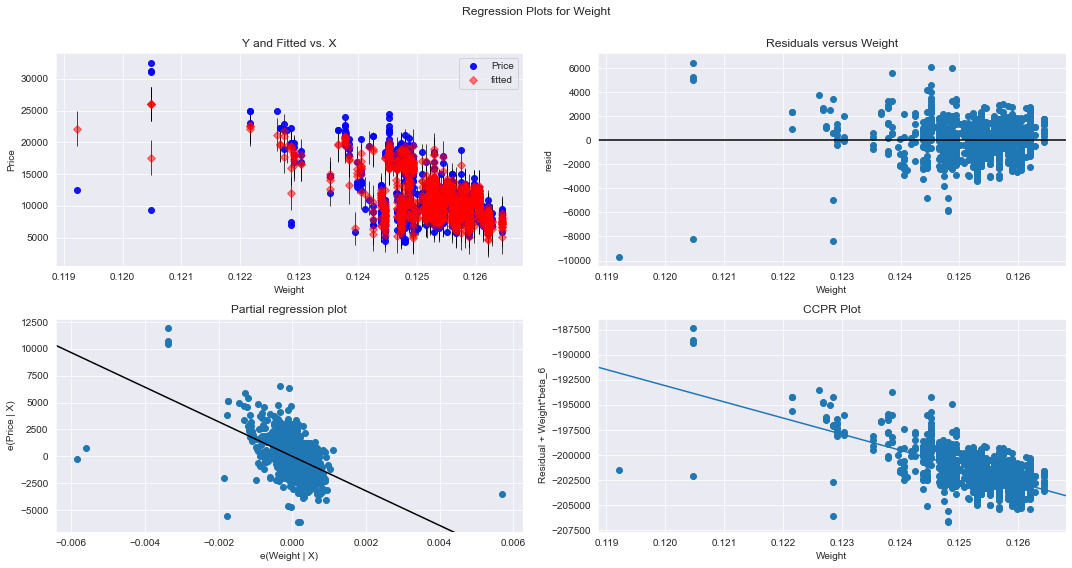

In [96]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

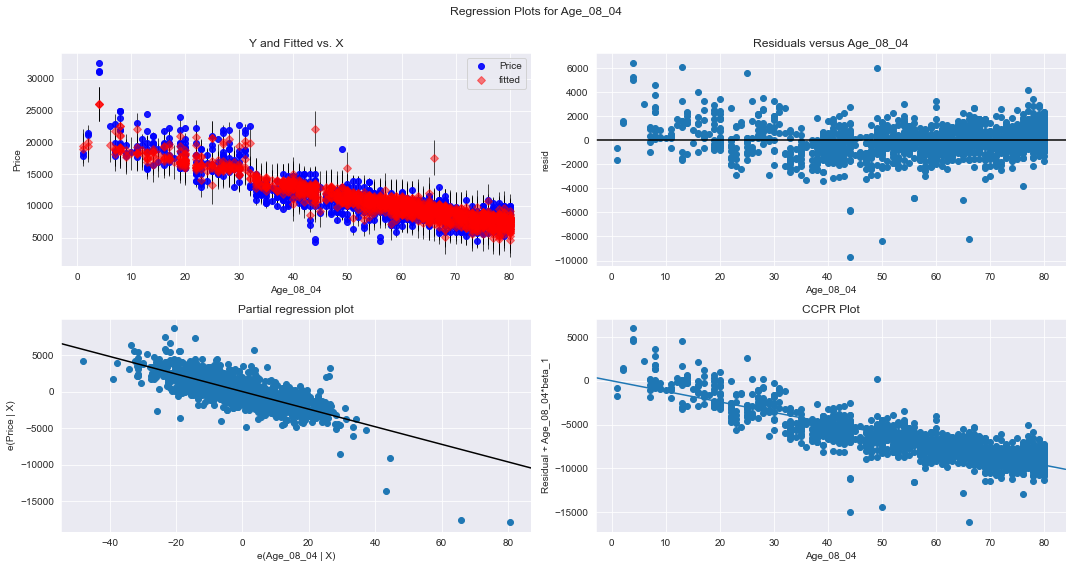

In [97]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age_08_04", fig=fig)
plt.show()

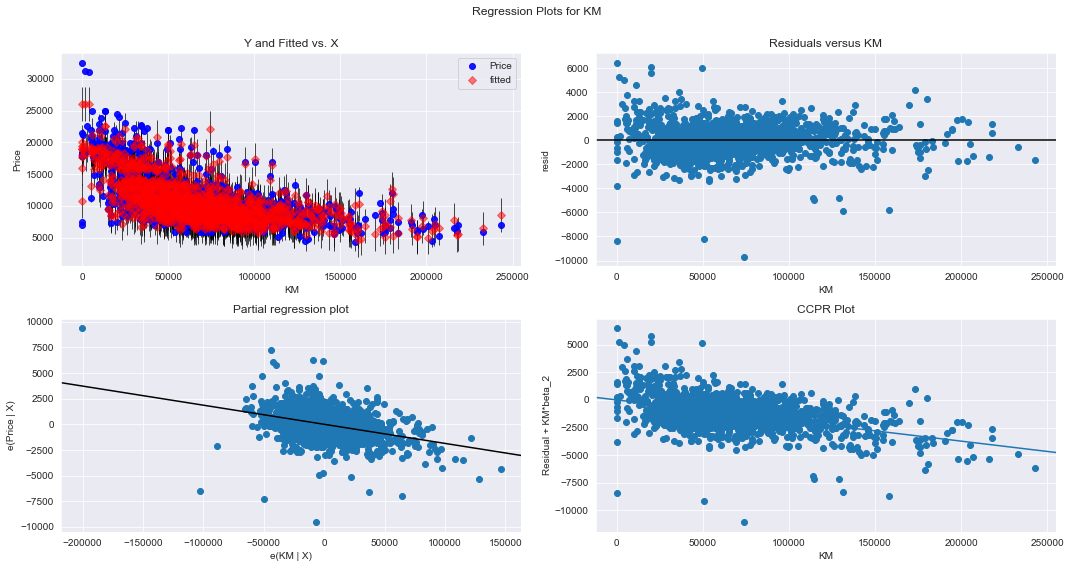

In [98]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

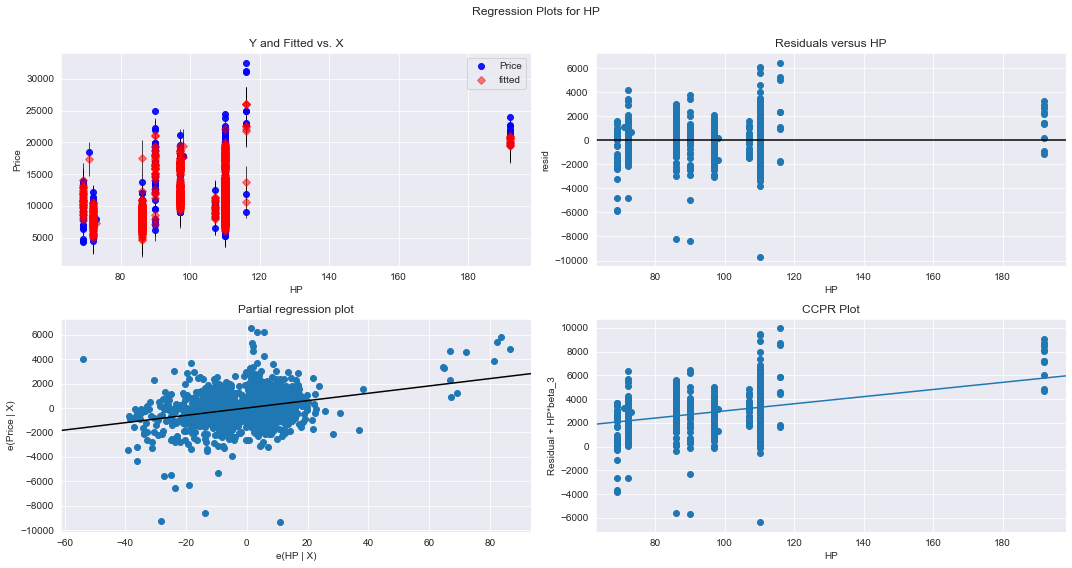

In [99]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

In [100]:
df.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'cc', 'Gears', 'Quarterly_Tax',
       'Weight'],
      dtype='object')

#### Prediction new data point

In [101]:
#for prediction
new_data=pd.DataFrame({'Age_08_04':4,'KM':40000,'HP':90,'cc':35,'Gears':5,'Quarterly_Tax':210,'Weight':0.124039},index=[1])

In [102]:
model.predict(new_data)

1   -36359.725364
dtype: float64

In [103]:
model.predict(df.iloc[0:5,])

0    16339.791765
1    15856.112623
2    16317.677399
3    15959.600529
4    15760.833530
dtype: float64

In [104]:
pred_y = model.predict(df)

In [105]:
pred_y

0       16339.791765
1       15856.112623
2       16317.677399
3       15959.600529
4       15760.833530
            ...     
1431     8820.741587
1432     8237.521447
1433     8394.930286
1434     8517.224813
1435    10768.846506
Length: 1436, dtype: float64